# Analiza Nobelovih nagrajencev

Ta zvezek vsebuje analizo podatkov o Nobelovih nagrajencih, pridobljenih s pomočjo skript
v mapi /izlusci_podatke.

Analizirali bomo:
- Število nagrajencev po področju;  
- Porazdelitev nagrajencev po državah;  
- Pogostost univerz;  
- Razporeditev po spolu;
- Države glede na število nagrajencev.

In [ ]:
import pandas as pd
pd.options.display.max_rows = 20

In [ ]:
osnovni_podatki = pd.read_csv("podatki/nobelovi_nagrajenci.csv", index_col="nagrajenec")
osnovni_podatki["desetletje"] = osnovni_podatki["leto"] // 10 * 10
drzave_po_prebivalcih = pd.read_csv("podatki/drzave_po_prebivalcih.csv", index_col="država")
nobel_po_drzavah = pd.read_csv("podatki/nobel_po_drzavah.csv", index_col="nagrajenec")
podatki_o_drzavah = pd.read_csv("podatki/podatki_o_drzavah.csv", index_col="država")
nobel_po_univerzah = pd.read_csv("podatki/nobel_po_univerzah.csv", index_col="nagrajenec")
nobel_po_spolu = pd.read_csv("podatki/nobel_po_spolu.csv", index_col="nagrajenec")

Za boljšo analizo, prenesimo še datoteko skupna_tabela.csv, iz katere bomo shranili leta rojstva in smrti nagrajencev.

In [ ]:
skupna_tabela = pd.read_csv("podatki/skupna_tabela.csv")
skupna_tabela["nagrajenec"] = skupna_tabela["firstname"] + " " + skupna_tabela["surname"]
# Shranimo podatke o letu rojstva in smrti kot integerje, da lažje z njima delamo.
skupna_tabela["leto rojstva"] = pd.to_numeric(skupna_tabela["born"].astype(str).str[:4], errors="coerce").astype("Int64")
skupna_tabela["leto smrti"] = pd.to_numeric(skupna_tabela["died"].astype(str).str[:4], errors="coerce").astype("Int64")
skupno = skupna_tabela[["nagrajenec", "leto rojstva", "leto smrti"]] # Potrebujemo samo te podatke.

## Analiza po starosti

Na začetku bomo analizirali Nobelove nagrajence po starosti na dva načina. Prvi seveda bo koliko let so imeli, ko so zaslužili nagrado. Bomo videli, kdo je najstarejši in kdo je najmlajši nagrajenec, pa še poračunali povprečje. Lahko to naredimo za vse nagrajence in za vsako področje zasebno. Podoben postopek naredimo za tiste, ki so nažalost umrli, in sicer vidimo koliko let so tedaj imeli. Tudi lahko preverimo, ali je kdo zaslužil nagrado po smrti in tako naprej. Za začetek združimo tabeli.

In [ ]:
tabela_po_starosti = pd.merge(osnovni_podatki, skupno, left_on="nagrajenec", right_on="nagrajenec")
tabela_po_starosti["leto nagrade"] = tabela_po_starosti["leto"] - tabela_po_starosti["leto rojstva"]
starejši_nagrajenci = tabela_po_starosti[tabela_po_starosti["leto smrti"] != 0] # Tukaj shranimo tiste, ki so že umrli.
starejši_nagrajenci = starejši_nagrajenci.copy() # Da nam Python ne sporoči težav.
starejši_nagrajenci["leto življenja"] = starejši_nagrajenci["leto smrti"] - starejši_nagrajenci["leto rojstva"]
starejši_nagrajenci["desetletje življenja"] = starejši_nagrajenci["leto življenja"] // 10 * 10

Pričakujemo da bodo med najstarejšima fiziki, ker jih je veliko, ki so nagrado zaslužili 30 ali 40 let po svojem projektu, kot recimo Higgs. Med najmlajšima pričakujemo nagrajence za mir.

In [ ]:
tabela_po_starosti.sort_values(["leto nagrade"], ascending=False).head(10)

,nagrajenec,področje,leto,desetletje,leto rojstva,leto smrti,leto nagrade
53,Arthur Ashkin,physics,2018,2010,1922,2020,96
27,Syukuro Manabe,physics,2021,2020,1931,0,90
175,Leonid Hurwicz,economic-sciences,2007,2000,1917,2008,90
28,Klaus Hasselmann,physics,2021,2020,1931,0,90
37,Roger Penrose,physics,2020,2020,1931,0,89
124,Lloyd S. Shapley,economic-sciences,2012,2010,1923,2016,89
220,Raymond Davis Jr.,physics,2002,2000,1914,2006,88
173,Doris Lessing,literature,2007,2000,1919,2013,88
210,Vitaly L. Ginzburg,physics,2003,2000,1916,2009,87
554,Peyton Rous,medicine,1966,1960,1879,1970,87


In [ ]:
tabela_po_starosti.sort_values(["leto nagrade"], ascending=False).tail(10)

,nagrajenec,področje,leto,desetletje,leto rojstva,leto smrti,leto nagrade
778,Frederick G. Banting,medicine,1923,1920,1891,1941,32
470,Mairead Corrigan,peace,1976,1970,1944,0,32
134,Tawakkol Karman,peace,2011,2010,1979,0,32
614,Tsung-Dao Lee,physics,1957,1950,1926,2024,31
711,Carl D. Anderson,physics,1936,1930,1905,1991,31
729,Werner Heisenberg,physics,1932,1930,1901,1976,31
725,Paul A.M. Dirac,physics,1933,1930,1902,1984,31
62,Nadia Murad,peace,2018,2010,1993,0,25
807,Lawrence Bragg,physics,1915,1910,1890,1971,25
104,Malala Yousafzai,peace,2014,2010,1997,0,17


Rezultat se večinoma ujema z našo domnevo, ampak je tudi veliko fizikov med najmlajšimi. Hkrati smo s to analizo videli, da je Malala Yousafzai najmlajši nagrajenec in Arthur Ashkin najstarejši.  
Poglejmo še, kako se spreminja število nagrajencev glede na leto življenja, v času ko so zavredili nagrado in povprečna starost nagrajenca. Seveda je predpostavka, da je največ tistih, med 50 in 60 let.

59.99


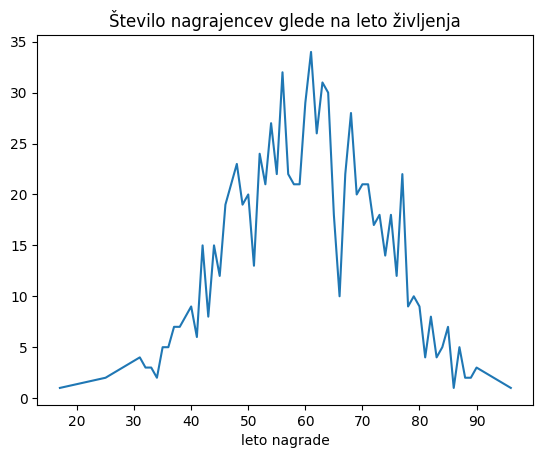

In [ ]:
nagrade_po_starosti = tabela_po_starosti.groupby('leto nagrade').size()
nagrade_po_starosti.plot(kind='line', title="Število nagrajencev glede na leto življenja")
print(round(tabela_po_starosti["leto nagrade"].mean(), 2))

Še eno smisleno vprašanje je: v katerem desetletju so nagrajenci bili najmlajši? To bomo naredili v naslednji vrstici.

<Axes: xlabel='desetletje'>

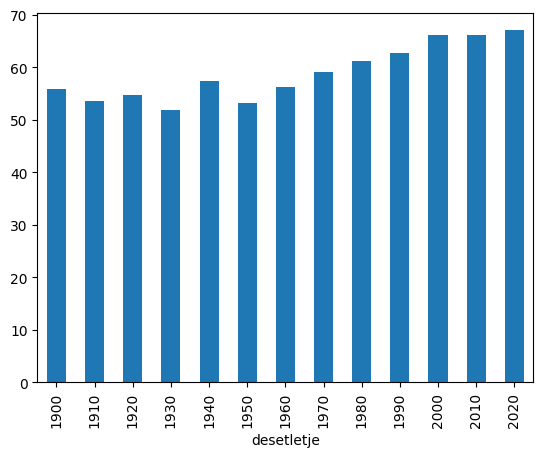

In [ ]:
tabela_po_starosti.groupby("desetletje")["leto nagrade"].mean().plot.bar()

Kot lahko vidimo, so nagrajenci v zadnjih petdesetih letih starejši kot prej. To se lahko nanaša na to, kar smo omenili prej, glede velikih fizikalnih raziskav in projektov, za katere že dolgo ne vemo, a so si nagrado zaslužili.

Naslednja analiza se osredotoča na tiste, ki so že umrli. Videli bomo, kako dolgo v povprečju živijo nagrajenci, koliko jih prejme nagrado ob koncu življenja, kdo pa jo je prejel po smrti in tako naprej. Čeprav se na primer fiziki veliko ukvarjajo z nevarnimi snovmi, pričakujemo, da bodo živeli dlje kot povprečen človek. Domnevamo, da je razlog v tem, da so skoraj vsi nagrajenci osredotočeni na svoje raziskave in ne razmišljajo preveč o splošnih problemih.

81.5


<Axes: title={'center': 'Koliko povprečno živijo Nobelovi nagrajenci?'}, xlabel='leto življenja'>

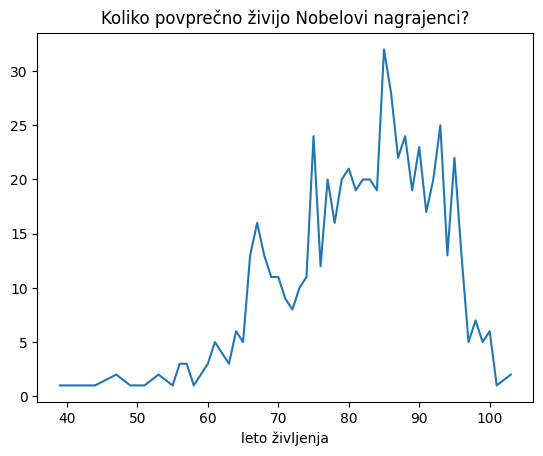

In [ ]:
print(round(starejši_nagrajenci["leto življenja"].mean(), 2))
nagrajenci_po_letih_zivljenja = starejši_nagrajenci.groupby("leto življenja").size()
nagrajenci_po_letih_zivljenja.plot(kind="line", title="Koliko povprečno živijo Nobelovi nagrajenci?")

<Axes: ylabel='count'>

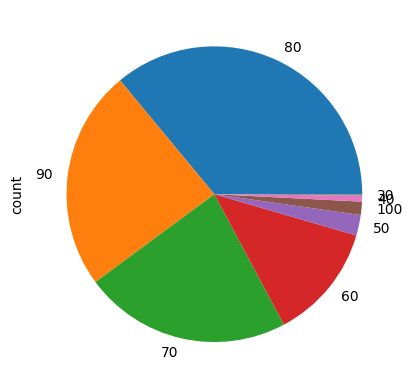

In [ ]:
starejši_nagrajenci["desetletje življenja"].value_counts().plot.pie()

<Axes: title={'center': 'Koliko pred smrt povprečen nagrajenec zavredi nagrado?'}, xlabel='razlika'>

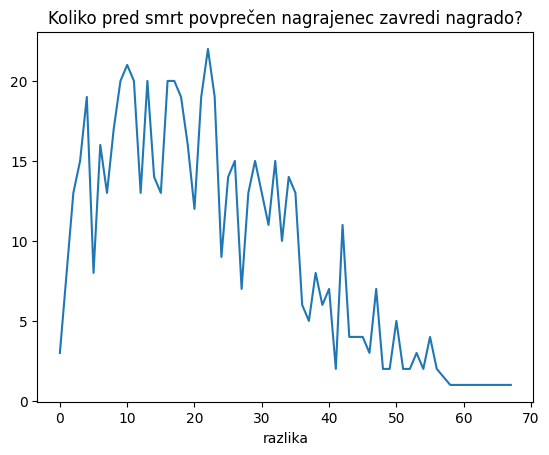

In [ ]:
starejši_nagrajenci["razlika"] = starejši_nagrajenci["leto življenja"] - starejši_nagrajenci["leto nagrade"] # Analiza, ki smo je že prej omenili.
razlika = starejši_nagrajenci.groupby("razlika").size()
razlika.plot(kind="line", title="Koliko pred smrt povprečen nagrajenec zavredi nagrado?")

<Axes: xlabel='desetletje'>

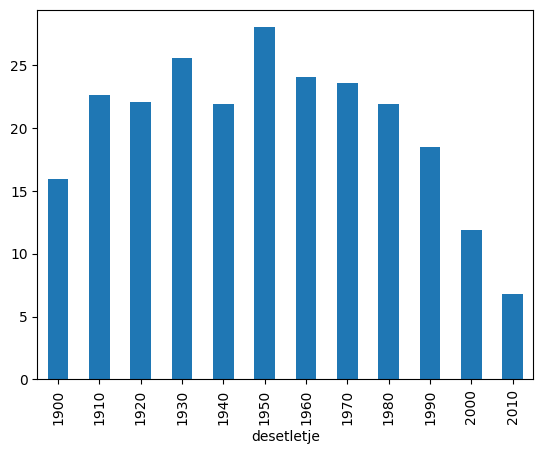

In [ ]:
starejši_nagrajenci.groupby("desetletje")["razlika"].mean().plot.bar()

In [ ]:
starejši_nagrajenci[starejši_nagrajenci["leto nagrade"] > starejši_nagrajenci["leto življenja"]]

,nagrajenec,področje,leto,desetletje,leto rojstva,leto smrti,leto nagrade,leto življenja,desetletje življenja,razlika


To razumemo kot smislen rezultat. Če je kdo zavredil nagrado v zadnjem desetletju in je že umrel, potem je v tem desetletju najmanjša "razlika". Tudi vidimo, da še nihče ni zaslužil Nobela po smrti.

Vse, kar smo naredili na splošno, lahko naredimo tudi za vsako področje posebej. Za konec analize o starosti, definirajmo še funkcijo, ki nam pove koliko povprečen nagrajenec živi, glede na področje in preverimo na primeru fizikov, ali funkcija res dela.

In [ ]:
def povprecno_zivljenje(podrocje):
    tabela = starejši_nagrajenci[starejši_nagrajenci["področje"] == podrocje]
    povprecje = tabela.groupby("leto življenja").size().reset_index(name="število")
    graf = povprecje.plot.scatter(x="leto življenja", y="število", title="Koliko povprečno živijo Nobelovi nagrajenci?")
    print(round(tabela["leto življenja"].mean(), 2))
    return graf

81.91


<Axes: title={'center': 'Koliko povprečno živijo Nobelovi nagrajenci?'}, xlabel='leto življenja', ylabel='število'>

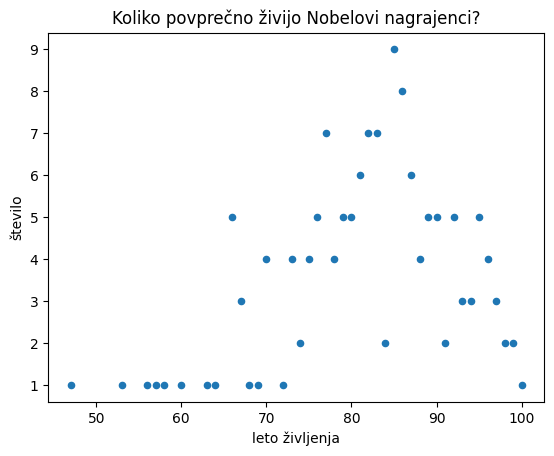

In [ ]:
povprecno_zivljenje("physics")

## Analiza po področjih

Seveda je najbolj smisleno prvo preveriti, kdo ima najviše nagrad numerično in v procentih. Očitno je da sta to fizika, kemija in medicina, pa je najmanjše tistih iz ekonomije, ker se je nagrada za ekonomijo začela v sedmem desetletju 20. stoletja.

področje
chemistry            196
economic-sciences     96
literature           120
medicine             228
peace                139
physics              226
dtype: int64

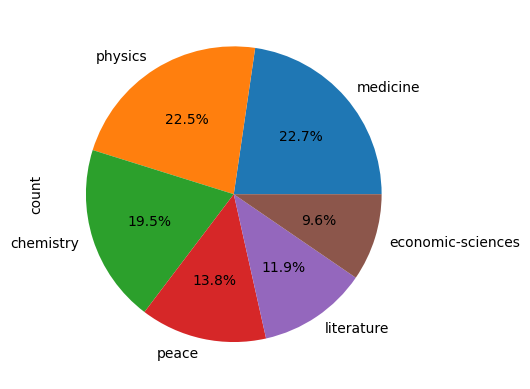

In [ ]:
osnovni_podatki["področje"].value_counts().plot.pie(autopct='%1.1f%%')
osnovni_podatki.groupby("področje").size()

Zdaj definirajmo funkcijo, ki nam za vsako področje pokaže, koliko nagrajencev je bilo v vsakem desetletju. Hkrati vidimo, v katerem desetletju se je nagrada za določeno področje začela.

In [ ]:
def nobel_po_podrocju(podrocje):
    tabela = osnovni_podatki[osnovni_podatki["področje"] == podrocje]
    st_po_desetletjih = tabela.groupby("desetletje").size().reset_index(name="število")
    graf = st_po_desetletjih.plot(x="desetletje", y="število", title="Koliko nagrajencev iz področja je bilo po desetletjih?")
    return graf

<Axes: title={'center': 'Koliko nagrajencev iz področja je bilo po desetletjih?'}, xlabel='desetletje'>

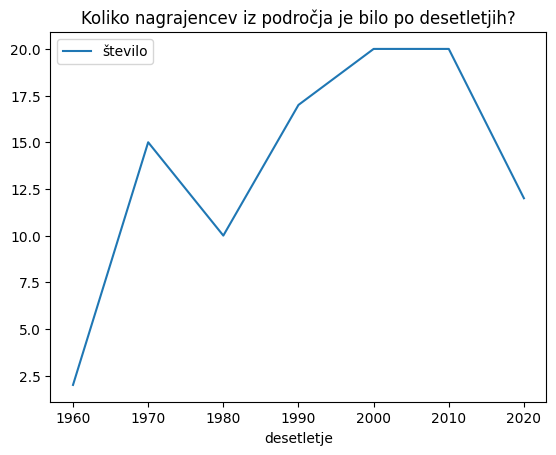

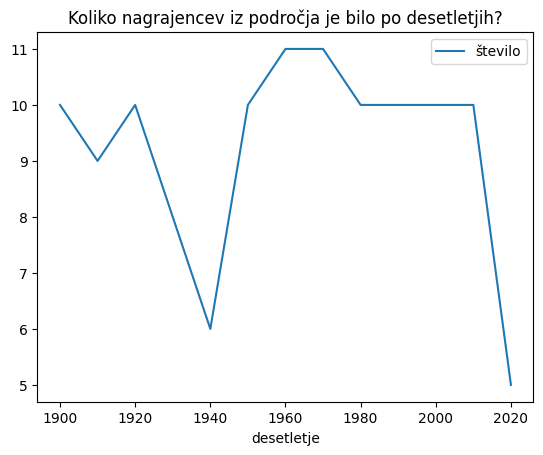

In [ ]:
nobel_po_podrocju("economic-sciences")
nobel_po_podrocju("literature")

Kot smo pričakovali, vidimo da je graf funkcije skoraj konstanta. Razlike se zgode v času Druge svetovne vojne ali izjemoma v enem letu nagrado zasluži več kot en nagrajenec. To ni res za fiziko, kemijo in medicino. V tem primeru se pogosto zgodi da več nagrajencev zavredi nagrado v enem letu zaradi skupne raziskave. Zato je pri, recimo, kemiji graf malce drugačen.

<Axes: title={'center': 'Koliko nagrajencev iz področja je bilo po desetletjih?'}, xlabel='desetletje'>

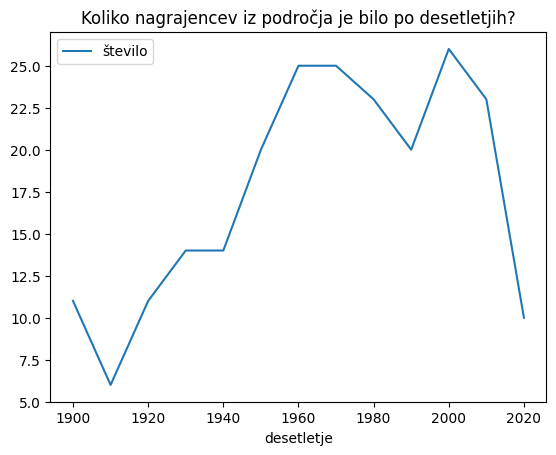

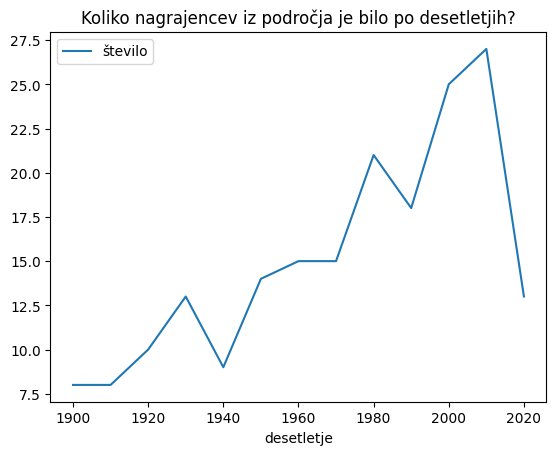

In [ ]:
nobel_po_podrocju("medicine")
nobel_po_podrocju("chemistry")

V nadaljevanju bomo še uporabili področja kot primerno skupino za analizo nekaterih podatkov

## Analiza po univerzah

Na začetku seveda preverimo, katere univerze imajo največ nagrajencev.

In [ ]:
nobel_po_univerzah.value_counts().head(10)

univerza                             
Harvard University                       28
Massachusetts Institute of Technology    25
Stanford University                      20
University of Chicago                    20
University of Cambridge                  19
Princeton University                     18
University of California, Berkeley       18
Columbia University                      17
Rockefeller University                   16
California Institute of Technology       16
Name: count, dtype: int64

Definirajmo funkcijo, ki nam pove, kako se spreminja število nagrajencev na določeni univerzi po desetletju.

In [ ]:
univerze = pd.merge(osnovni_podatki, nobel_po_univerzah, left_on="nagrajenec", right_on="nagrajenec")
def univerza_skozi_desetletja(univerza):
    univerza_po_desetletjih = univerze[univerze["univerza"] == univerza]
    stevilo = univerza_po_desetletjih["desetletje"].value_counts().sort_index()
    return stevilo.plot(kind="bar")

<Axes: xlabel='desetletje'>

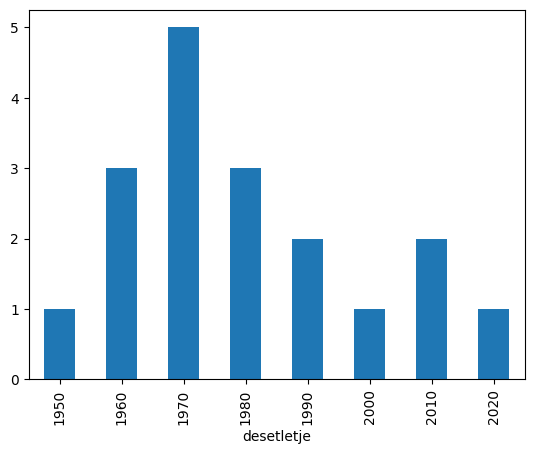

In [ ]:
univerza_skozi_desetletja("Harvard University")

Zelo zanimivo je pogledati še, katere univerze so najboljše glede na področje. Pričakujemo da ne bomo dobili isto za literaturo ali fiziko. V ta namen definirajmo še eno funkcijo.

In [ ]:
def univerze_po_podrocju(podrocje):
    tabela = univerze[univerze["področje"] == podrocje]
    return tabela["univerza"].value_counts().head(10)

In [ ]:
univerze_po_podrocju("peace")

univerza
California Institute of Technology    1
Harvard University                    1
Columbia University                   1
Sorbonne University                   1
Name: count, dtype: int64

In [ ]:
univerze_po_podrocju("medicine")

univerza
Rockefeller University                             7
Karolinska Institute                               4
Columbia University                                3
Massachusetts Institute of Technology              3
Johns Hopkins School of Medicine                   3
UCSF School of Medicine                            3
Fred Hutchinson Cancer Research Center             2
University of Texas Southwestern Medical Center    2
Harvard Medical School                             2
University of Cambridge                            2
Name: count, dtype: int64

## Analiza po državah

Skoraj vse priprave za analizo Nobelovih nagrajencev po državah smo že naredili prej. Spomnimo se, da imamo podatke o številu prebivalcev, številu nagrad za določeno državo, pa pomemben podatek o številu nagrad glede na 100 tisoč prebivalcev. V naši analizi bomo združili te podatke i poiskali kakšno zvezo med njimi. Na začetku preverimo osnovne podatke: koliko držav ima Nobelovega nagrajenca, koliko pa ne, katere imajo največ nagrajencev, katera je največja država, ki nima nagrajenca, in tako naprej...

In [ ]:
stevilo_nagrad_po_drzavi = podatki_o_drzavah["skupno"]
stevilo_nagrad_po_drzavi.sort_values(ascending=False)

država
United States       381
United Kingdom      118
France               63
Germany              61
Sweden               33
                   ... 
Montserrat            0
Falkland Islands      0
Tokelau               0
Niue                  0
Holy See              0
Name: skupno, Length: 232, dtype: int64

In [ ]:
drzave = pd.merge(podatki_o_drzavah, drzave_po_prebivalcih, left_on="država", right_on="država")
drzave_z_nagradami = drzave[drzave["skupno"] > 0]
drzave_brez_nagrad = drzave[drzave["skupno"] == 0]["število prebivalcev"]

In [ ]:
drzave_brez_nagrad.sort_values(ascending=False) # Poglejmo, katere so največje države, ki nimajo Nobelovega nagrajenca.

država
Indonesia           285721236
Brazil              212812405
Philippines         116786962
DR Congo            112832473
Vietnam             101598527
                      ...    
Montserrat               4359
Falkland Islands         3469
Tokelau                  2608
Niue                     1821
Holy See                  501
Name: število prebivalcev, Length: 177, dtype: int64

In [ ]:
drzave_brez_nagrad.size # Poglejmo še, koliko jih sploh je.

177

In [ ]:
drzave_z_nagradami.sort_values("nagrade na prebivalce", ascending=False)

,skupno,nagrade na prebivalce,število prebivalcev
država,,,
Sweden,33,0.309666,10656633
Switzerland,24,0.267636,8967407
Iceland,1,0.251088,398266
Denmark,12,0.199916,6002507
Norway,11,0.195623,5623071
...,...,...,...
Ethiopia,1,0.000738,135472051
Bangladesh,1,0.000569,175686899
Nigeria,1,0.000421,237527782


V tem primeru vidimo, da imamo relativno male države, ki imajo Nobelovega nagrajenca kot so Sweden, Switzerland in Iceland. Trije države s Skandinavskega polotoka so v TOP 5.

<Axes: title={'center': 'število Nobelovih nagrajencev po državah'}, xlabel='število prebivalcev'>

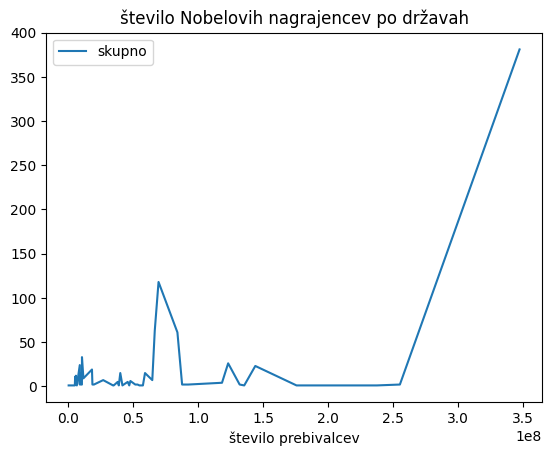

In [ ]:
# Da imamo čim boljšo analizo, bomo zanemarili Kitajske pa Indije, oziroma tiste države, ki imajo več kot 10 ** 9 prebivalcev.
drzave_z_nagradami[drzave_z_nagradami["število prebivalcev"] < 10 ** 9].plot(
    x="število prebivalcev", y="skupno", title="število Nobelovih nagrajencev po državah"
    )

Lahko rečemo da naša domneva ni bila napačna. Število nagrajencev res narašča z številom prebivalcev. V nasprotni smeri pričakujemo, da bo odvisnost števila nagrad na 100 tisoč prebivalcev glede na skupno število prebivalcev podobno padalo.

<Axes: title={'center': 'število Nobelovih nagrajencev na 100 tisoč prebivalcev'}, xlabel='število prebivalcev', ylabel='nagrade na prebivalce'>

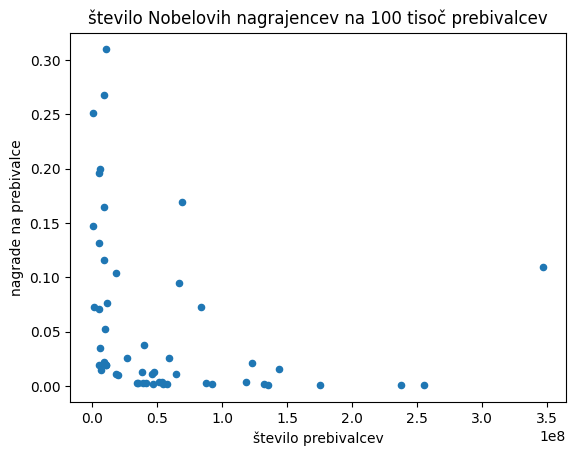

In [ ]:
drzave_z_nagradami[drzave_z_nagradami["število prebivalcev"] < 10 ** 9].plot.scatter(
    x="število prebivalcev", y="nagrade na prebivalce", title="število Nobelovih nagrajencev na 100 tisoč prebivalcev"
    )

Za konec analize državah definirajmo še funkcijo, ki, podobno kot prej, sprejme področje in vrne število nagrajencev po državi iz tistega področja.

In [ ]:
def drzave_po_podrocju(podrocje):
    tabela = pd.merge(
        nobel_po_drzavah[nobel_po_drzavah["država"].apply(lambda x: "founded" not in str(x).lower())], # Izognimo se organizacij, ker ne vemo državo.
        osnovni_podatki[osnovni_podatki["področje"] == podrocje],
        left_on="nagrajenec", right_on="nagrajenec"
    )
    return tabela["država"].value_counts().head(10)

In [ ]:
drzave_po_podrocju("peace")

država
United States       18
United Kingdom       4
South Africa         3
Germany              3
Northern Ireland     3
Israel               3
Russia               3
India                2
France               2
Sweden               2
Name: count, dtype: int64

## Analiza po spolu

Za konec našega projekta, poglejmo še nekatere zanimive podatke o spolu Nobelovih nagrajencev.

In [ ]:
spol_nagrajencev = pd.merge(osnovni_podatki, nobel_po_spolu, left_on="nagrajenec", right_on="nagrajenec")

In [ ]:
spol_nagrajencev[spol_nagrajencev["spol"] == "male"].shape[0]


832

In [ ]:
spol_nagrajencev[spol_nagrajencev["spol"] == "female"].shape[0]

60

<Axes: title={'center': 'Število ženskih Nobelovih nagrajencev skozi desetletja'}, xlabel='desetletje'>

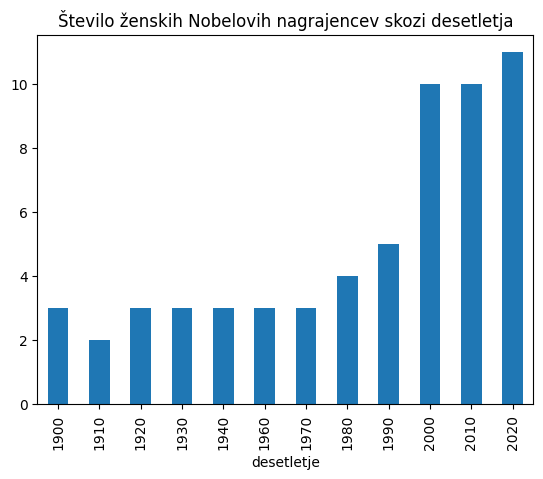

In [ ]:
zenske = spol_nagrajencev[spol_nagrajencev['spol'] == 'female']
stevilo_zenskih = zenske['desetletje'].value_counts().sort_index()
stevilo_zenskih.plot(kind='bar', title="Število ženskih Nobelovih nagrajencev skozi desetletja")


Kot smo pričakovali, število ženskih Nobelovih nagrajencev narašča zaradi razvoja sveta, demokracije in pravice žensk do izobrazbe. Poglejmo natančno zgled tega rasta.

In [ ]:
stevilo_zenskih

desetletje
1900     3
1910     2
1920     3
1930     3
1940     3
1960     3
1970     3
1980     4
1990     5
2000    10
2010    10
2020    11
Name: count, dtype: int64

<Axes: xlabel='desetletje'>

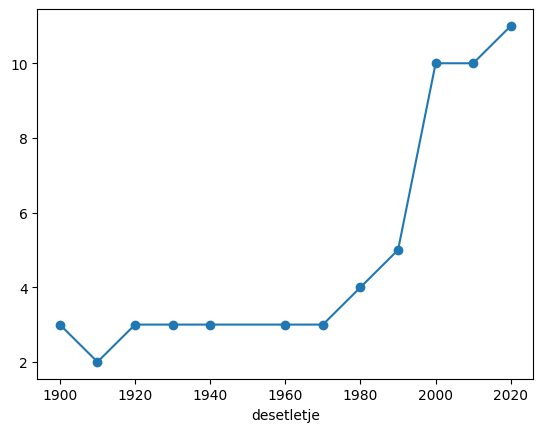

In [ ]:
stevilo_skupin = spol_nagrajencev[spol_nagrajencev['spol'] == 'female'].groupby('desetletje').size()
stevilo_skupin.plot(kind='line', marker='o') # marker='o' pomeni, da natančno naznači število z krogom.

Za konec naše analize definirajmo še eno podobno funkcijo, ki nam podajo število moških ali ženskih nagrajencev glede na področje.

In [ ]:
def spol_po_podrocju(spol, podrocje):
    tabela = spol_nagrajencev[(spol_nagrajencev["spol"] == spol) & (spol_nagrajencev["področje"] == podrocje)]
    return tabela.shape[0]

In [ ]:
spol_po_podrocju("male", "peace")

83

In [ ]:
spol_po_podrocju("female", "chemistry")

10

## Zaključek

Ta analiza ponuja celovit pregled Nobelovih nagrad skozi zgodovino in razkriva zanimive vzorce in trende pri podeljevanju po področjih, državah, spolu in drugih značilnostih. Ta projekt se nanaša na vse raziskave, ki vplivajo na podeljevanje Nobelovih nagrad in njihovo vlogo pri oblikovanju svetovne znanstvene in kulturne skupnosti. Upam, da bo ta analiza koristna za vse, ki jih zanima zgodovina znanosti in družbenih pojavov.